# Przeprowadzam eksperyment na Bazie Australian Credit Approval

## Pobieram Dane

In [ ]:
import os
%pwd

'C:\\Users\\mwojd'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

%matplotlib notebook

In [ ]:
try:
    from tqdm.notebook import tqdm
except ModuleNotFoundError:
    import sys
    !conda install --yes --prefix {sys.prefix} tqdm
    !conda install -c conda-forge --yes --prefix {sys.prefix} ipywidgets

    from tqdm.notebook import tqdm

### Dokonuje sprawdzenia jakości siedmiu klasyfikatorów takich jak :
    1.KNeighborsClassifier
    2.DecisionTreeClassifier
    3.GradienBoostingClassifer
    4.RandomForestClassifer
    5.GausianNB
    6.LogisticRegresion
    7.MLPClassifer

In [ ]:
# lista modeli do przetestowania
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("DSC", DecisionTreeClassifier(random_state=0)),
    ("GBC", GradientBoostingClassifier(n_estimators=100, random_state=0)),
    ("RFC", RandomForestClassifier(random_state=0)),
    ("GNB", GaussianNB()),
    ("LR", LogisticRegression(solver='lbfgs', random_state=0, max_iter=10000)),
    ("MLP", MLPClassifier(random_state=1, max_iter=10000))
]

In [ ]:
def get_australian_credit_data(path="Bazy_Danych_do_mgr/australian_credit.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 0 i 1
    df_class_1 = df[df.Class == 1]
    df_class_0 = df[df.Class == 0]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_0_random_slice = df_class_0.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_0_random_slice, df_class_1, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:14]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y


def get_vehicle_data(path="Bazy_Danych_do_mgr/Baza_vehicle.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    df.columns = df.columns.str.strip()
    
    # podział danych na klasy 3 i 4
    df_class_3 = df[df.Class == 3]
    df_class_4 = df[df.Class == 4]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_4_random_slice = df_class_4.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_4_random_slice, df_class_3, how="outer")
    
    # display(df_imbalanced.Class.value_counts())

    X = df_imbalanced.iloc[:, 0:15]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_balanced_scale_data(path="Bazy_Danych_do_mgr/Baza_balanced_scale.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 8 i 9
    df_class_8 = df[df.Class == 8]
    df_class_9 = df[df.Class == 9]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_8_random_slice = df_class_8.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_8_random_slice, df_class_9, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:4]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_biodegradation_data(path="Bazy_Danych_do_mgr/Baza_biodegradation.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 10 i 11
    df_class_10 = df[df.Class == 10]
    df_class_11 = df[df.Class == 11]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_11_random_slice = df_class_11.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_11_random_slice, df_class_10, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:17]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_car_evolution_data(path="Bazy_Danych_do_mgr/Baza_car_ewolution.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 3 i 4
    df_class_3 = df[df.Class == 3]
    df_class_4 = df[df.Class == 4]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_3_random_slice = df_class_3.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_3_random_slice, df_class_4, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:6]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_diabetic_data(path="Bazy_Danych_do_mgr/baza_diabetic.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 0 i 1
    df_class_0 = df[df.Class == 0]
    df_class_1 = df[df.Class == 1]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_1_random_slice = df_class_1.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_1_random_slice, df_class_0, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:18]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_german_credit_data(path="Bazy_Danych_do_mgr/Baza_german_credit.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 1 i 2
    df_class_1 = df[df.Class == 1]
    df_class_2 = df[df.Class == 2]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_1_random_slice = df_class_1.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_1_random_slice, df_class_2, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:13]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_multiple_features_data(path="Bazy_Danych_do_mgr/Baza_mulitiple_features.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 3 i 4
    df_class_3 = df[df.Class == 3]
    df_class_4 = df[df.Class == 4]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_4_random_slice = df_class_4.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_4_random_slice, df_class_3, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:19]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_optdigits_data(path="Bazy_Danych_do_mgr/Baza_Optdigits.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 5 i 7
    df_class_5 = df[df.Class == 5]
    df_class_7 = df[df.Class == 7]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_5_random_slice = df_class_5.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_5_random_slice, df_class_7, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:17]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

def get_wine_data(path="Bazy_Danych_do_mgr/Baza_wine.xlsx", frac=1):
    # wczytanie danych z pliku
    df = pd.read_excel(path)
    
    # podział danych na klasy 1 i 3
    df_class_1 = df[df.Class == 1]
    df_class_3 = df[df.Class == 3]
    
    # losowe wycięcie danych z klasy decyzyjnej 0 (od 10 do 60%)
    df_class_1_random_slice = df_class_1.sample(frac=frac, random_state=0)
    df_imbalanced = pd.merge(df_class_1_random_slice, df_class_3, how="outer")
    
    # display(df_imbalanced.Class.value_counts())
    
    X = df_imbalanced.iloc[:, 0:13]
    y = df_imbalanced.iloc[:, -1]
    
    return X, y

In [ ]:
# eval('get_vehicle_data(frac=1)')

In [ ]:
datasets = {
    'australian_credit': 'get_australian_credit_data',
    'vehicle': 'get_vehicle_data',
    'balanced_scale': 'get_balanced_scale_data',
    'biodegradation': 'get_biodegradation_data',
    'car_evolution': 'get_car_evolution_data',
    'diabetic': 'get_diabetic_data',
    'german_credit': 'get_german_credit_data',
    'multiple_features': 'get_multiple_features_data',
    'optdits': 'get_optdigits_data',
    'wine': 'get_wine_data'
}

In [ ]:
# eval(datasets['australian_credit']+'(frac=0.5)')

In [ ]:
results_all_datasets = {}

for dataset_name, func in tqdm(datasets.items(), desc='bazy danych'):
    results_all_datasets[dataset_name] = {
        'none': {},
        'under-sampling': {},
        'over-sampling': {},
        'SMOTE': {},
    }

    for imbalance_ratio in tqdm([.1, .2, .3, .4, .5, .6], desc='proporcja danych - 10%, 20%, ..., 60%'):
        X, y = eval(func+'(frac=imbalance_ratio)')

        # przygotowanie danych pod klasyfikację    
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        # display(y_train.value_counts())
        # display(y_test.value_counts())

        for method in tqdm(['none', 'under-sampling', 'over-sampling', 'SMOTE']):
            if method == 'none':
                X_train, y_train = X, y
            if method == 'under-sampling':
                rus = RandomUnderSampler(sampling_strategy=1)
                X_train, y_train = rus.fit_resample(X, y)
            if method == 'over-sampling':
                ros = RandomOverSampler(random_state=0)
                X_train, y_train = ros.fit_resample(X, y)
            if method == 'SMOTE':
                smote = SMOTE()
                X_train, y_train = smote.fit_resample(X, y)

            # evaluate each model in turn
            results = {}
            for name, model in models:
                kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=0)
                cv_results = cross_val_score(
                    model, X_train, y_train, cv=kfold, scoring="balanced_accuracy"
                )
                results[name] = round(cv_results.mean(), 2)

                # msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
                # print(msg)

            results_all_datasets[dataset_name][method][str(imbalance_ratio*100)+'%'] = results

bazy danych:   0%|          | 0/10 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

proporcja danych - 10%, 20%, ..., 60%:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame.from_dict(results_all_datasets, orient="index").stack().to_frame()
df = pd.DataFrame(df[0].values.tolist(), index=df.index)
# df = pd.DataFrame(df[0].values.tolist(), index=df.index)
df

10.0%  \
australian_credit none            {'KNN': 0.74, 'DSC': 0.74, 'GBC': 0.77, 'RFC':...   
                  under-sampling  {'KNN': 0.84, 'DSC': 0.76, 'GBC': 0.78, 'RFC':...   
                  over-sampling   {'KNN': 0.95, 'DSC': 0.97, 'GBC': 0.97, 'RFC':...   
                  SMOTE           {'KNN': 0.94, 'DSC': 0.93, 'GBC': 0.97, 'RFC':...   
vehicle           none            {'KNN': 0.55, 'DSC': 0.5, 'GBC': 0.51, 'RFC': ...   
                  under-sampling  {'KNN': 0.53, 'DSC': 0.5, 'GBC': 0.52, 'RFC': ...   
                  over-sampling   {'KNN': 0.91, 'DSC': 0.95, 'GBC': 0.95, 'RFC':...   
                  SMOTE           {'KNN': 0.87, 'DSC': 0.85, 'GBC': 0.91, 'RFC':...   
balanced_scale    none            {'KNN': 0.49, 'DSC': 0.48, 'GBC': 0.49, 'RFC':...   
                  under-sampling  {'KNN': 0.49, 'DSC': 0.43, 'GBC': 0.45, 'RFC':...   
                  over-sampling   {'KNN': 0.91, 'DSC': 0.95, 'GBC': 0.89, 'RFC':...   
                  SMOTE           {'KNN': 0.82, 'DSC': 0.89, 'GBC': 0.93, 'RFC':...   
biodegradation    none            {'KNN': 0.68, 'DSC': 0.69, 'GBC': 0.69, 'RFC':...   
                  under-sampling  {'KNN': 0.77, 'DSC': 0.67, 'GBC': 0.75, 'RFC':...   
                  over-sampling   {'KNN': 0.92, 'DSC': 0.96, 'GBC': 0.96, 'RFC':...   
                  SMOTE           {'KNN': 0.91, 'DSC': 0.88, 'GBC': 0.92, 'RFC':...   
car_evolution     none            {'KNN': 0.49, 'DSC': 0.5, 'GBC': 0.5, 'RFC': 0...   
                  under-sampling  {'KNN': 0.57, 'DSC': 0.49, 'GBC': 0.57, 'RFC':...   
                  over-sampling   {'KNN': 0.88, 'DSC': 0.94, 'GBC': 0.89, 'RFC':...   
                  SMOTE           {'KNN': 0.85, 'DSC': 0.85, 'GBC': 0.9, 'RFC': ...   
diabetic          none            {'KNN': 0.55, 'DSC': 0.6, 'GBC': 0.6, 'RFC': 0...   
                  under-sampling  {'KNN': 0.56, 'DSC': 0.6, 'GBC': 0.61, 'RFC': ...   
                  over-sampling   {'KNN': 0.94, 'DSC': 0.96, 'GBC': 0.97, 'RFC':...   
                  SMOTE           {'KNN': 0.9, 'DSC': 0.88, 'GBC': 0.94, 'RFC': ...   
german_credit     none            {'KNN': 0.56, 'DSC': 0.49, 'GBC': 0.53, 'RFC':...   
                  under-sampling  {'KNN': 0.58, 'DSC': 0.59, 'GBC': 0.58, 'RFC':...   
                  over-sampling   {'KNN': 0.8, 'DSC': 0.88, 'GBC': 0.91, 'RFC': ...   
                  SMOTE           {'KNN': 0.78, 'DSC': 0.78, 'GBC': 0.86, 'RFC':...   
multiple_features none            {'KNN': 0.49, 'DSC': 0.49, 'GBC': 0.53, 'RFC':...   
                  under-sampling  {'KNN': 0.49, 'DSC': 0.64, 'GBC': 0.64, 'RFC':...   
                  over-sampling   {'KNN': 0.91, 'DSC': 0.94, 'GBC': 0.98, 'RFC':...   
                  SMOTE           {'KNN': 0.83, 'DSC': 0.87, 'GBC': 0.93, 'RFC':...   
optdits           none            {'KNN': 0.82, 'DSC': 0.77, 'GBC': 0.75, 'RFC':...   
                  under-sampling  {'KNN': 0.87, 'DSC': 0.77, 'GBC': 0.84, 'RFC':...   
                  over-sampling   {'KNN': 0.97, 'DSC': 0.96, 'GBC': 0.92, 'RFC':...   
                  SMOTE           {'KNN': 0.97, 'DSC': 0.92, 'GBC': 0.95, 'RFC':...   
wine              none            {'KNN': 0.95, 'DSC': 0.96, 'GBC': 0.98, 'RFC':...   
                  under-sampling  {'KNN': 0.96, 'DSC': 0.96, 'GBC': 1.0, 'RFC': ...   
                  over-sampling   {'KNN': 0.99, 'DSC': 0.99, 'GBC': 1.0, 'RFC': ...   
                  SMOTE           {'KNN': 1.0, 'DSC': 0.98, 'GBC': 1.0, 'RFC': 1...   

                                                                              20.0%  \
australian_credit none            {'KNN': 0.71, 'DSC': 0.7, 'GBC': 0.78, 'RFC': ...   
                  under-sampling  {'KNN': 0.78, 'DSC': 0.67, 'GBC': 0.73, 'RFC':...   
                  over-sampling   {'KNN': 0.9, 'DSC': 0.95, 'GBC': 0.96, 'RFC': ...   
                  SMOTE           {'KNN': 0.9, 'DSC': 0.89, 'GBC': 0.92, 'RFC': ...   
vehicle           none            {'KNN': 0.54, 'DSC': 0.5, 'GBC': 0.51, 'R

In [ ]:
df_knn = df.applymap(lambda x: x['KNN'])
df_knn

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.74   0.71   0.80   0.79   0.81   0.83
                  under-sampling   0.84   0.78   0.85   0.80   0.82   0.82
                  over-sampling    0.95   0.90   0.87   0.84   0.83   0.83
                  SMOTE            0.94   0.90   0.87   0.85   0.86   0.83
vehicle           none             0.55   0.54   0.53   0.50   0.51   0.50
                  under-sampling   0.53   0.53   0.55   0.48   0.50   0.49
                  over-sampling    0.91   0.82   0.74   0.67   0.63   0.59
                  SMOTE            0.87   0.80   0.76   0.68   0.64   0.61
balanced_scale    none             0.49   0.50   0.53   0.53   0.53   0.56
                  under-sampling   0.49   0.59   0.53   0.53   0.53   0.59
                  over-sampling    0.91   0.82   0.75   0.68   0.65   0.65
                  SMOTE            0.82   0.81   0.79   0.74   0.71   0.69
biodegradation    none             0.68   0.75   0.77   0.79   0.80   0.81
                  under-sampling   0.77   0.77   0.79   0.79   0.80   0.80
                  over-sampling    0.92   0.86   0.84   0.82   0.81   0.82
                  SMOTE            0.91   0.89   0.85   0.82   0.81   0.82
car_evolution     none             0.49   0.50   0.48   0.50   0.51   0.52
                  under-sampling   0.57   0.51   0.49   0.52   0.51   0.52
                  over-sampling    0.88   0.76   0.66   0.61   0.58   0.55
                  SMOTE            0.85   0.78   0.72   0.67   0.63   0.59
diabetic          none             0.55   0.56   0.57   0.58   0.61   0.59
                  under-sampling   0.56   0.62   0.66   0.57   0.57   0.62
                  over-sampling    0.94   0.86   0.77   0.73   0.68   0.67
                  SMOTE            0.90   0.85   0.80   0.75   0.71   0.68
german_credit     none             0.56   0.56   0.52   0.53   0.54   0.54
                  under-sampling   0.58   0.51   0.55   0.54   0.54   0.53
                  over-sampling    0.80   0.68   0.59   0.57   0.58   0.62
                  SMOTE            0.78   0.70   0.63   0.57   0.60   0.66
multiple_features none             0.49   0.52   0.50   0.49   0.51   0.49
                  under-sampling   0.49   0.50   0.42   0.52   0.49   0.49
                  over-sampling    0.91   0.85   0.75   0.70   0.64   0.61
                  SMOTE            0.83   0.82   0.76   0.74   0.68   0.64
optdits           none             0.82   0.87   0.89   0.91   0.92   0.92
                  under-sampling   0.87   0.89   0.90   0.91   0.91   0.92
                  over-sampling    0.97   0.95   0.93   0.93   0.92   0.92
                  SMOTE            0.97   0.95   0.94   0.94   0.93   0.92
wine              none             0.95   0.97   0.99   1.00   0.99   0.99
                  under-sampling   0.96   0.98   0.99   1.00   0.99   0.99
                  over-sampling    0.99   0.99   0.98   1.00   0.98   0.99
                  SMOTE            1.00   1.00   0.99   1.00   0.99   0.99

In [ ]:
%matplotlib inline

<IPython.core.display.Javascript object>


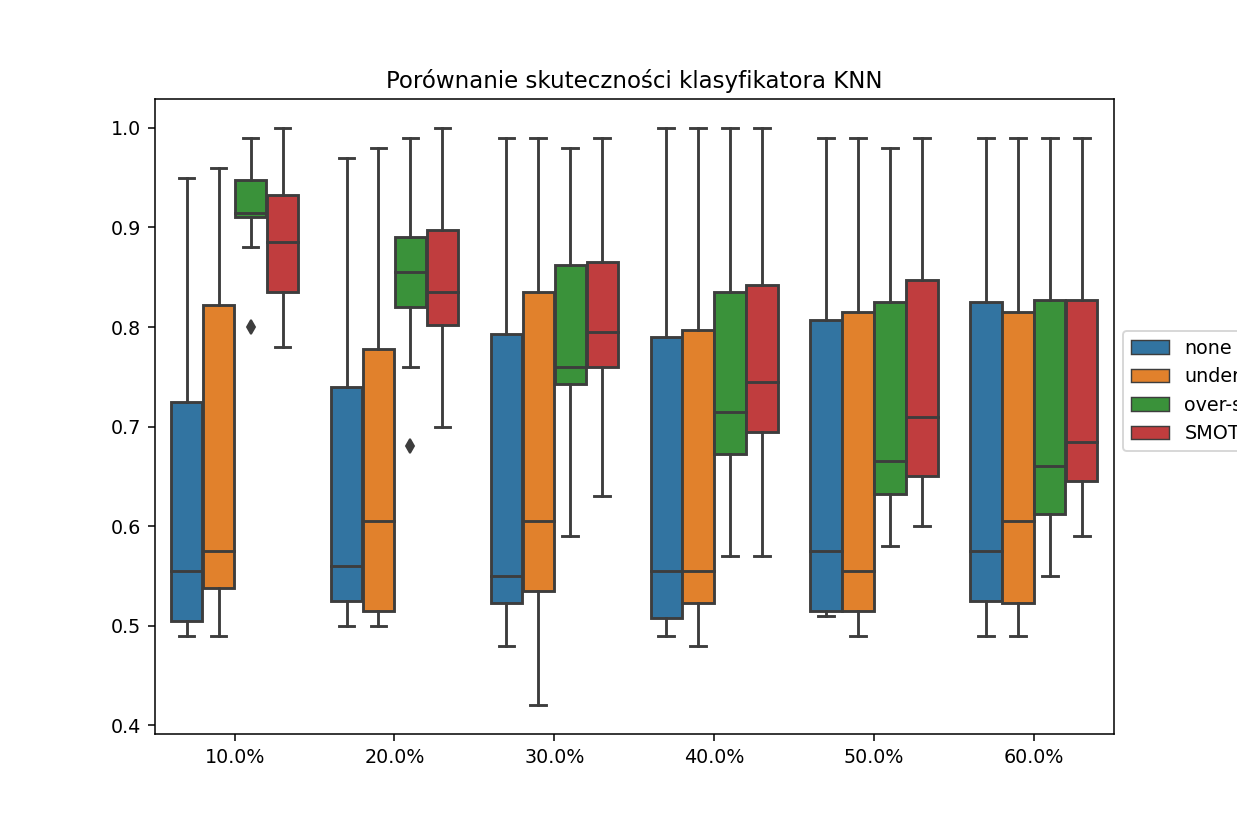

In [ ]:
df_knn_stacked = df_knn.stack()

plt.figure(figsize=(9, 6))

sns.boxplot(
    x=df_knn_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_knn_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_knn_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora KNN')
plt.show()

In [ ]:
df_dsc = df.applymap(lambda x: x['DSC'])
df_dsc

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.74   0.70   0.77   0.77   0.78   0.78
                  under-sampling   0.76   0.67   0.79   0.76   0.80   0.80
                  over-sampling    0.97   0.95   0.92   0.90   0.86   0.83
                  SMOTE            0.93   0.89   0.85   0.85   0.83   0.82
vehicle           none             0.50   0.50   0.49   0.48   0.49   0.47
                  under-sampling   0.50   0.48   0.58   0.51   0.50   0.48
                  over-sampling    0.95   0.89   0.83   0.76   0.71   0.65
                  SMOTE            0.85   0.75   0.71   0.65   0.63   0.57
balanced_scale    none             0.48   0.52   0.52   0.51   0.53   0.55
                  under-sampling   0.43   0.52   0.49   0.53   0.54   0.56
                  over-sampling    0.95   0.91   0.85   0.80   0.76   0.71
                  SMOTE            0.89   0.81   0.78   0.71   0.69   0.65
biodegradation    none             0.69   0.74   0.75   0.76   0.76   0.76
                  under-sampling   0.67   0.72   0.75   0.74   0.77   0.77
                  over-sampling    0.96   0.89   0.85   0.82   0.76   0.79
                  SMOTE            0.88   0.85   0.81   0.78   0.77   0.80
car_evolution     none             0.50   0.52   0.49   0.48   0.50   0.51
                  under-sampling   0.49   0.50   0.51   0.53   0.52   0.51
                  over-sampling    0.94   0.87   0.81   0.74   0.66   0.63
                  SMOTE            0.85   0.73   0.69   0.63   0.60   0.55
diabetic          none             0.60   0.62   0.61   0.60   0.61   0.63
                  under-sampling   0.60   0.59   0.60   0.62   0.62   0.61
                  over-sampling    0.96   0.92   0.88   0.83   0.77   0.74
                  SMOTE            0.88   0.81   0.74   0.71   0.68   0.69
german_credit     none             0.49   0.53   0.54   0.55   0.50   0.54
                  under-sampling   0.59   0.56   0.55   0.53   0.55   0.58
                  over-sampling    0.88   0.77   0.68   0.58   0.60   0.66
                  SMOTE            0.78   0.69   0.62   0.57   0.57   0.61
multiple_features none             0.49   0.49   0.49   0.48   0.50   0.50
                  under-sampling   0.64   0.54   0.48   0.54   0.49   0.56
                  over-sampling    0.94   0.91   0.87   0.81   0.74   0.68
                  SMOTE            0.87   0.80   0.74   0.68   0.65   0.61
optdits           none             0.77   0.82   0.83   0.83   0.84   0.84
                  under-sampling   0.77   0.81   0.82   0.84   0.83   0.84
                  over-sampling    0.96   0.94   0.92   0.90   0.88   0.86
                  SMOTE            0.92   0.90   0.89   0.87   0.86   0.85
wine              none             0.96   0.98   0.96   0.98   0.98   0.97
                  under-sampling   0.96   0.98   0.97   0.98   0.98   0.97
                  over-sampling    0.99   1.00   0.97   0.99   0.99   0.98
                  SMOTE            0.98   1.00   0.97   0.98   0.98   0.98

In [ ]:
%matplotlib inline

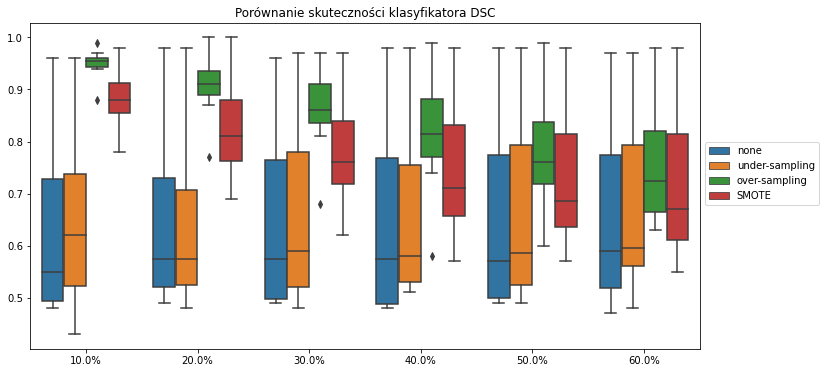

In [ ]:
df_dsc_stacked = df_dsc.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_dsc_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_dsc_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_dsc_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora DSC')
plt.show()

In [ ]:
df_gbc = df.applymap(lambda x: x['GBC'])
df_gbc

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.77   0.78   0.84   0.86   0.86   0.86
                  under-sampling   0.78   0.73   0.85   0.81   0.86   0.86
                  over-sampling    0.97   0.96   0.94   0.92   0.89   0.89
                  SMOTE            0.97   0.92   0.90   0.90   0.88   0.88
vehicle           none             0.51   0.51   0.49   0.47   0.50   0.50
                  under-sampling   0.52   0.48   0.55   0.48   0.49   0.48
                  over-sampling    0.95   0.85   0.79   0.71   0.66   0.62
                  SMOTE            0.91   0.84   0.77   0.69   0.64   0.62
balanced_scale    none             0.49   0.54   0.54   0.52   0.53   0.54
                  under-sampling   0.45   0.54   0.57   0.51   0.50   0.55
                  over-sampling    0.89   0.76   0.70   0.64   0.64   0.61
                  SMOTE            0.93   0.87   0.82   0.76   0.72   0.66
biodegradation    none             0.69   0.78   0.81   0.83   0.83   0.84
                  under-sampling   0.75   0.80   0.83   0.83   0.83   0.82
                  over-sampling    0.96   0.91   0.88   0.85   0.83   0.85
                  SMOTE            0.92   0.89   0.87   0.84   0.83   0.85
car_evolution     none             0.50   0.51   0.50   0.51   0.49   0.51
                  under-sampling   0.57   0.54   0.51   0.52   0.52   0.51
                  over-sampling    0.89   0.75   0.69   0.66   0.63   0.59
                  SMOTE            0.90   0.84   0.75   0.69   0.61   0.57
diabetic          none             0.60   0.61   0.63   0.65   0.68   0.68
                  under-sampling   0.61   0.60   0.64   0.67   0.69   0.67
                  over-sampling    0.97   0.90   0.85   0.81   0.78   0.76
                  SMOTE            0.94   0.87   0.82   0.78   0.76   0.74
german_credit     none             0.53   0.57   0.61   0.61   0.61   0.58
                  under-sampling   0.58   0.59   0.60   0.62   0.60   0.61
                  over-sampling    0.91   0.82   0.73   0.64   0.65   0.69
                  SMOTE            0.86   0.75   0.69   0.64   0.63   0.66
multiple_features none             0.53   0.51   0.52   0.53   0.54   0.50
                  under-sampling   0.64   0.49   0.47   0.53   0.51   0.54
                  over-sampling    0.98   0.93   0.87   0.80   0.75   0.70
                  SMOTE            0.93   0.84   0.78   0.72   0.68   0.62
optdits           none             0.75   0.81   0.85   0.86   0.87   0.88
                  under-sampling   0.84   0.86   0.87   0.87   0.87   0.88
                  over-sampling    0.92   0.91   0.89   0.88   0.88   0.88
                  SMOTE            0.95   0.92   0.91   0.90   0.89   0.88
wine              none             0.98   0.98   0.96   0.98   0.98   0.97
                  under-sampling   1.00   0.98   0.98   0.98   0.98   0.97
                  over-sampling    1.00   1.00   0.98   0.99   0.99   0.98
                  SMOTE            1.00   1.00   0.98   0.98   0.98   0.98

In [ ]:
%matplotlib inline

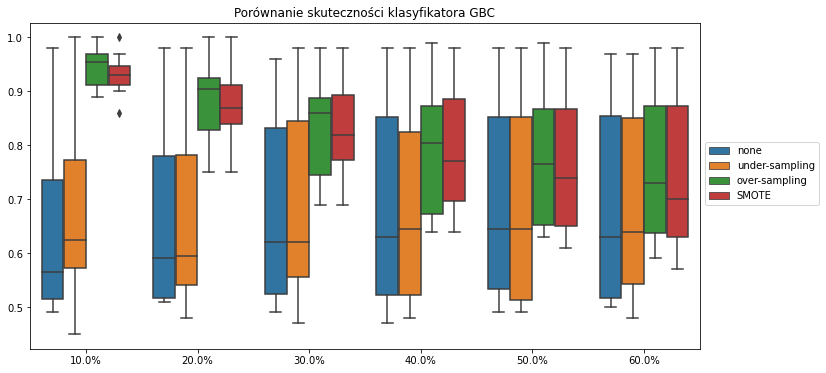

In [ ]:
df_gbc_stacked = df_gbc.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_gbc_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_gbc_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_gbc_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora GBC')
plt.show()

In [ ]:
df_rfc = df.applymap(lambda x: x['RFC'])
df_rfc

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.71   0.77   0.84   0.85   0.87   0.87
                  under-sampling   0.79   0.80   0.87   0.83   0.86   0.87
                  over-sampling    0.98   0.96   0.94   0.93   0.90   0.90
                  SMOTE            0.97   0.93   0.91   0.91   0.89   0.88
vehicle           none             0.51   0.51   0.49   0.50   0.51   0.48
                  under-sampling   0.53   0.52   0.54   0.50   0.50   0.48
                  over-sampling    0.98   0.94   0.88   0.81   0.76   0.68
                  SMOTE            0.94   0.86   0.80   0.73   0.69   0.62
balanced_scale    none             0.50   0.51   0.52   0.51   0.52   0.55
                  under-sampling   0.44   0.54   0.52   0.53   0.52   0.59
                  over-sampling    0.96   0.91   0.88   0.81   0.78   0.73
                  SMOTE            0.93   0.87   0.81   0.75   0.72   0.67
biodegradation    none             0.70   0.81   0.83   0.83   0.83   0.84
                  under-sampling   0.76   0.81   0.83   0.83   0.84   0.83
                  over-sampling    0.97   0.93   0.90   0.87   0.84   0.86
                  SMOTE            0.93   0.91   0.87   0.86   0.85   0.85
car_evolution     none             0.50   0.50   0.50   0.51   0.50   0.52
                  under-sampling   0.56   0.52   0.49   0.53   0.50   0.52
                  over-sampling    0.99   0.95   0.88   0.79   0.68   0.63
                  SMOTE            0.94   0.86   0.79   0.73   0.66   0.60
diabetic          none             0.56   0.58   0.63   0.66   0.68   0.69
                  under-sampling   0.59   0.63   0.70   0.67   0.68   0.68
                  over-sampling    0.99   0.97   0.93   0.89   0.84   0.80
                  SMOTE            0.95   0.90   0.86   0.81   0.79   0.77
german_credit     none             0.50   0.54   0.58   0.61   0.59   0.57
                  under-sampling   0.58   0.61   0.62   0.60   0.59   0.60
                  over-sampling    0.97   0.88   0.74   0.62   0.65   0.72
                  SMOTE            0.90   0.80   0.70   0.64   0.64   0.69
multiple_features none             0.50   0.49   0.49   0.50   0.48   0.48
                  under-sampling   0.59   0.50   0.43   0.53   0.51   0.51
                  over-sampling    1.00   0.98   0.92   0.85   0.79   0.73
                  SMOTE            0.96   0.91   0.84   0.79   0.75   0.68
optdits           none             0.77   0.86   0.89   0.91   0.91   0.92
                  under-sampling   0.86   0.89   0.90   0.91   0.91   0.92
                  over-sampling    0.99   0.97   0.96   0.95   0.93   0.93
                  SMOTE            0.98   0.96   0.95   0.94   0.93   0.92
wine              none             0.98   0.99   1.00   1.00   1.00   0.99
                  under-sampling   0.96   1.00   1.00   1.00   1.00   1.00
                  over-sampling    1.00   1.00   1.00   1.00   1.00   0.99
                  SMOTE            1.00   1.00   1.00   1.00   1.00   0.99

In [ ]:
%matplotlib inline

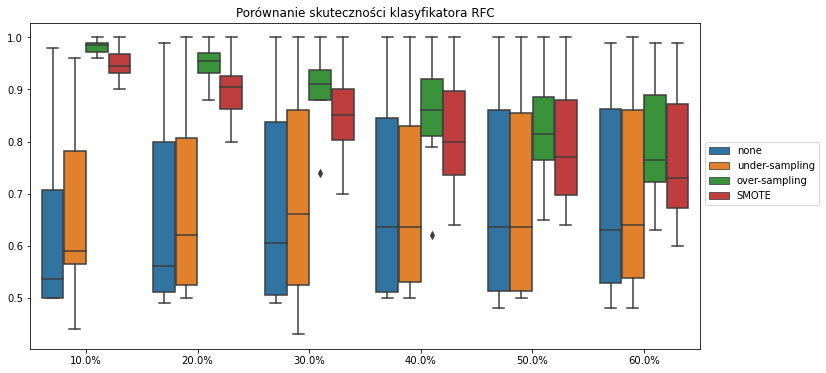

In [ ]:
df_rfc_stacked = df_rfc.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_rfc_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_rfc_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_rfc_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora RFC')
plt.show()

In [ ]:
df_gnb = df.applymap(lambda x: x['GNB'])
df_gnb

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.72   0.78   0.79   0.79   0.79   0.78
                  under-sampling   0.76   0.75   0.80   0.78   0.82   0.77
                  over-sampling    0.72   0.78   0.79   0.78   0.78   0.77
                  SMOTE            0.77   0.80   0.80   0.79   0.80   0.79
vehicle           none             0.49   0.50   0.50   0.50   0.50   0.51
                  under-sampling   0.48   0.49   0.47   0.54   0.51   0.49
                  over-sampling    0.50   0.51   0.52   0.51   0.51   0.50
                  SMOTE            0.58   0.54   0.54   0.52   0.52   0.51
balanced_scale    none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.44   0.55   0.53   0.55   0.56   0.55
                  over-sampling    0.60   0.55   0.55   0.55   0.57   0.57
                  SMOTE            0.63   0.58   0.57   0.58   0.53   0.53
biodegradation    none             0.77   0.74   0.76   0.77   0.75   0.76
                  under-sampling   0.77   0.77   0.77   0.77   0.76   0.75
                  over-sampling    0.78   0.75   0.77   0.77   0.76   0.76
                  SMOTE            0.77   0.75   0.77   0.75   0.76   0.75
car_evolution     none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.57   0.48   0.52   0.51   0.50   0.48
                  over-sampling    0.54   0.55   0.52   0.52   0.51   0.51
                  SMOTE            0.59   0.56   0.52   0.51   0.53   0.50
diabetic          none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.57   0.62   0.51   0.51   0.50   0.50
                  over-sampling    0.51   0.50   0.50   0.50   0.50   0.50
                  SMOTE            0.52   0.50   0.50   0.50   0.50   0.50
german_credit     none             0.55   0.56   0.60   0.58   0.57   0.57
                  under-sampling   0.62   0.57   0.58   0.57   0.57   0.56
                  over-sampling    0.62   0.60   0.57   0.57   0.58   0.57
                  SMOTE            0.67   0.60   0.59   0.57   0.58   0.59
multiple_features none             0.49   0.52   0.52   0.52   0.54   0.50
                  under-sampling   0.55   0.49   0.53   0.51   0.56   0.52
                  over-sampling    0.65   0.56   0.59   0.58   0.56   0.54
                  SMOTE            0.71   0.59   0.59   0.55   0.53   0.52
optdits           none             0.65   0.67   0.69   0.69   0.69   0.68
                  under-sampling   0.69   0.67   0.66   0.68   0.68   0.68
                  over-sampling    0.70   0.68   0.69   0.68   0.68   0.68
                  SMOTE            0.71   0.68   0.69   0.67   0.68   0.68
wine              none             1.00   1.00   1.00   1.00   1.00   0.99
                  under-sampling   1.00   1.00   1.00   1.00   1.00   1.00
                  over-sampling    1.00   1.00   1.00   1.00   0.99   0.99
                  SMOTE            1.00   1.00   1.00   1.00   1.00   0.99

In [ ]:
%matplotlib inline

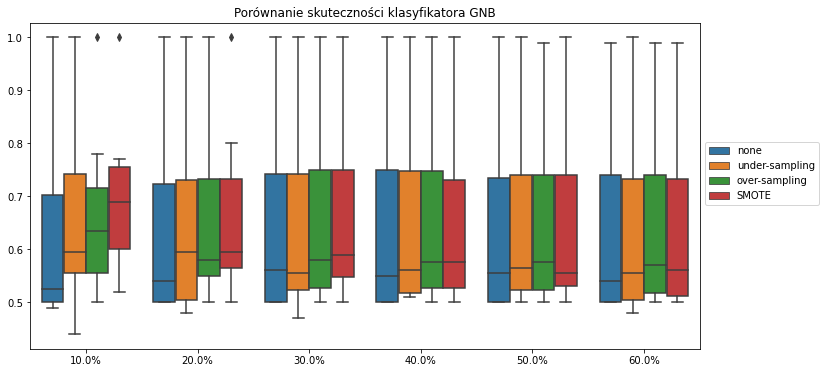

In [ ]:
df_gnb_stacked = df_gnb.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_gnb_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_gnb_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_gnb_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora GNB')
plt.show()

In [ ]:
df_lr = df.applymap(lambda x: x['LR'])
df_lr

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.77   0.80   0.84   0.84   0.84   0.85
                  under-sampling   0.83   0.80   0.86   0.85   0.87   0.85
                  over-sampling    0.88   0.83   0.86   0.86   0.87   0.86
                  SMOTE            0.89   0.86   0.86   0.86   0.86   0.86
vehicle           none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.46   0.44   0.50   0.49   0.50   0.45
                  over-sampling    0.54   0.53   0.53   0.52   0.51   0.51
                  SMOTE            0.58   0.52   0.53   0.51   0.52   0.52
balanced_scale    none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.49   0.55   0.53   0.53   0.54   0.55
                  over-sampling    0.57   0.53   0.53   0.53   0.57   0.56
                  SMOTE            0.64   0.56   0.57   0.56   0.52   0.54
biodegradation    none             0.69   0.78   0.81   0.83   0.82   0.83
                  under-sampling   0.83   0.83   0.81   0.83   0.83   0.83
                  over-sampling    0.87   0.85   0.84   0.84   0.83   0.83
                  SMOTE            0.87   0.87   0.84   0.84   0.83   0.84
car_evolution     none             0.50   0.50   0.50   0.50   0.50   0.50
                  under-sampling   0.53   0.52   0.53   0.52   0.50   0.50
                  over-sampling    0.52   0.54   0.51   0.52   0.52   0.51
                  SMOTE            0.57   0.54   0.51   0.51   0.52   0.51
diabetic          none             0.56   0.63   0.67   0.68   0.69   0.69
                  under-sampling   0.57   0.72   0.67   0.71   0.71   0.71
                  over-sampling    0.77   0.76   0.73   0.73   0.74   0.72
                  SMOTE            0.81   0.76   0.74   0.74   0.75   0.73
german_credit     none             0.51   0.53   0.59   0.62   0.60   0.58
                  under-sampling   0.57   0.58   0.61   0.63   0.60   0.60
                  over-sampling    0.65   0.61   0.61   0.60   0.62   0.60
                  SMOTE            0.65   0.61   0.62   0.60   0.62   0.61
multiple_features none             0.50   0.50   0.49   0.49   0.49   0.48
                  under-sampling   0.57   0.53   0.51   0.48   0.55   0.49
                  over-sampling    0.69   0.63   0.54   0.55   0.55   0.56
                  SMOTE            0.71   0.64   0.53   0.56   0.51   0.53
optdits           none             0.57   0.62   0.68   0.70   0.72   0.74
                  under-sampling   0.72   0.73   0.74   0.73   0.74   0.74
                  over-sampling    0.75   0.73   0.73   0.73   0.74   0.74
                  SMOTE            0.77   0.74   0.73   0.74   0.74   0.74
wine              none             0.98   1.00   1.00   1.00   0.99   0.98
                  under-sampling   0.96   1.00   1.00   1.00   0.98   0.99
                  over-sampling    1.00   1.00   1.00   1.00   0.99   0.99
                  SMOTE            1.00   1.00   1.00   1.00   0.99   0.98

In [ ]:
%matplotlib inline

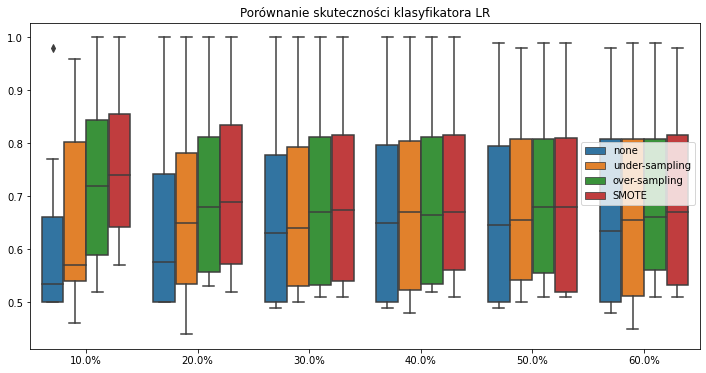

In [ ]:
df_lr_stacked = df_lr.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_lr_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_lr_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_lr_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora LR')
plt.show()

In [ ]:
df_mlp = df.applymap(lambda x: x['MLP'])
df_mlp

10.0%  20.0%  30.0%  40.0%  50.0%  60.0%
australian_credit none             0.76   0.73   0.79   0.81   0.83   0.82
                  under-sampling   0.80   0.72   0.82   0.80   0.83   0.83
                  over-sampling    0.98   0.95   0.93   0.90   0.87   0.87
                  SMOTE            0.97   0.94   0.93   0.89   0.88   0.86
vehicle           none             0.54   0.52   0.51   0.51   0.52   0.48
                  under-sampling   0.53   0.49   0.58   0.54   0.48   0.48
                  over-sampling    0.95   0.85   0.74   0.68   0.63   0.57
                  SMOTE            0.93   0.83   0.75   0.67   0.61   0.58
balanced_scale    none             0.50   0.49   0.50   0.49   0.51   0.52
                  under-sampling   0.49   0.49   0.55   0.53   0.50   0.57
                  over-sampling    0.95   0.87   0.79   0.71   0.66   0.65
                  SMOTE            0.85   0.79   0.75   0.69   0.65   0.63
biodegradation    none             0.75   0.82   0.80   0.82   0.84   0.84
                  under-sampling   0.81   0.84   0.80   0.83   0.84   0.83
                  over-sampling    0.96   0.92   0.88   0.86   0.85   0.85
                  SMOTE            0.95   0.92   0.88   0.86   0.84   0.86
car_evolution     none             0.51   0.49   0.48   0.48   0.50   0.52
                  under-sampling   0.52   0.50   0.45   0.52   0.50   0.50
                  over-sampling    0.93   0.81   0.71   0.64   0.60   0.55
                  SMOTE            0.89   0.78   0.70   0.64   0.60   0.54
diabetic          none             0.63   0.67   0.70   0.70   0.70   0.71
                  under-sampling   0.59   0.70   0.71   0.68   0.68   0.68
                  over-sampling    0.97   0.94   0.91   0.87   0.84   0.78
                  SMOTE            0.96   0.92   0.89   0.85   0.82   0.77
german_credit     none             0.57   0.54   0.56   0.58   0.57   0.56
                  under-sampling   0.64   0.54   0.60   0.58   0.57   0.58
                  over-sampling    0.92   0.82   0.70   0.61   0.63   0.69
                  SMOTE            0.91   0.79   0.69   0.61   0.63   0.68
multiple_features none             0.51   0.49   0.50   0.49   0.48   0.49
                  under-sampling   0.53   0.53   0.50   0.51   0.52   0.50
                  over-sampling    0.97   0.93   0.89   0.82   0.76   0.70
                  SMOTE            0.97   0.91   0.87   0.82   0.76   0.69
optdits           none             0.84   0.89   0.90   0.91   0.92   0.92
                  under-sampling   0.85   0.89   0.90   0.91   0.92   0.92
                  over-sampling    0.98   0.97   0.96   0.95   0.94   0.93
                  SMOTE            0.98   0.96   0.95   0.94   0.93   0.93
wine              none             0.98   1.00   1.00   1.00   0.99   0.98
                  under-sampling   0.96   1.00   1.00   1.00   0.99   0.98
                  over-sampling    1.00   1.00   1.00   1.00   0.99   0.99
                  SMOTE            1.00   1.00   1.00   1.00   0.99   0.98

In [ ]:
%matplotlib inline

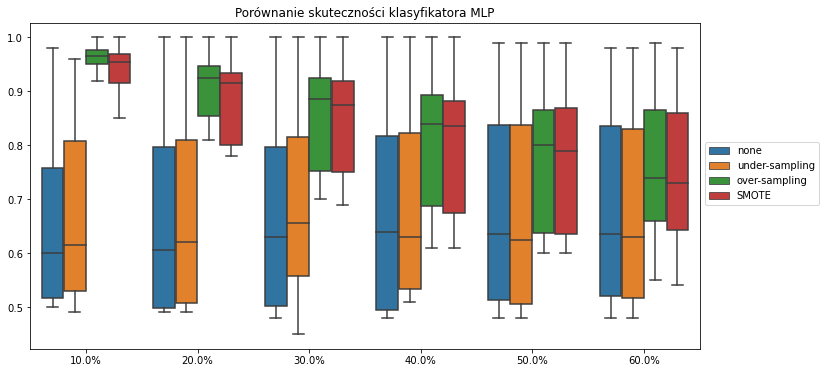

In [ ]:
df_mlp_stacked = df_mlp.stack()

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df_mlp_stacked.index.get_level_values(2),  # stopień niezbalansowania - 10%, 20%, ...
    y=df_mlp_stacked.values,  # balanced_accuracy uśrednione po CV (walidacja krzyżowa)
    hue=df_mlp_stacked.index.get_level_values(1)  # dodatkowy algorytm (under/over/SMOTE)
)

plt.legend(bbox_to_anchor=(1, .65))
plt.title('Porównanie skuteczności klasyfikatora MLP')
plt.show()